In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\CSV files'

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('train.csv')
data
data1 = pd.read_csv('test.csv')

In [6]:
len(data)

891

In [7]:
data.head()
# '''listing some abbrevations
# survived = 1 and died = 0,sibSp = siblings or spouse in titanic,Parch = parents with children, S=SOUTHAMPTON,Q=QUEENSTOWN,C = CHERBOURG'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [9]:
data['Age'].min(),data['Age'].max()

(0.42, 80.0)

In [10]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## percentage of survived 

In [11]:
data['Survived'].value_counts() *100/len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [12]:
data['Sex'].value_counts() *100/len(data)

male      64.758698
female    35.241302
Name: Sex, dtype: float64

In [13]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

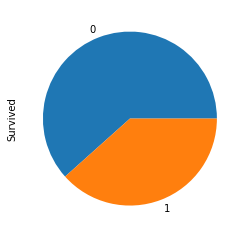

In [14]:
%matplotlib inline
alpha_color = 0.5
data['Survived'].value_counts().plot(kind = 'pie')

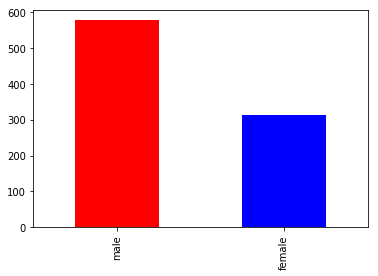

In [15]:
data['Sex'].value_counts().plot(kind= 'bar',color = ['Red','blue'])

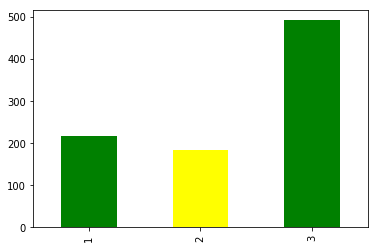

In [16]:
data['Pclass'].value_counts().sort_index().plot(kind = 'bar', color = ['green','yellow'])

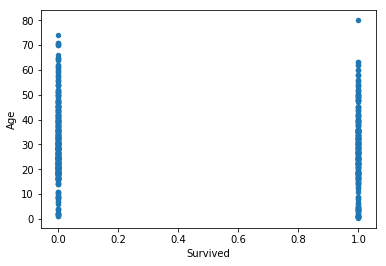

In [17]:
data.plot(kind = 'Scatter' , x = 'Survived', y = 'Age')

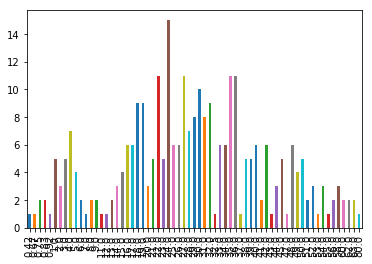

In [18]:
data[data['Survived'] ==1]['Age'].value_counts().sort_index().plot(kind = 'Bar')

## Rearranging the Data

In [19]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
data['Agebin'] = pd.cut(data['Age'], bins)

## Survived passenger visualization data

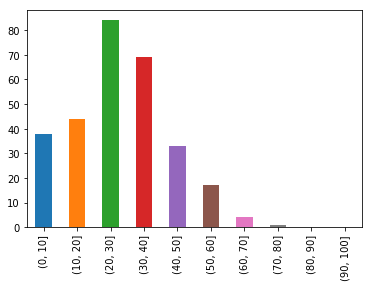

In [20]:
data[data['Survived'] ==1]['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

## Passengers who died

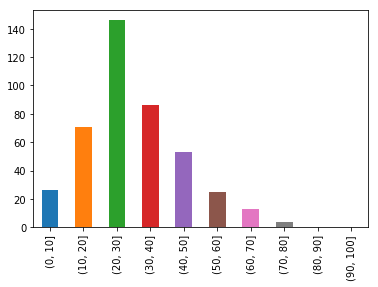

In [21]:
data[data['Survived'] ==0]['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

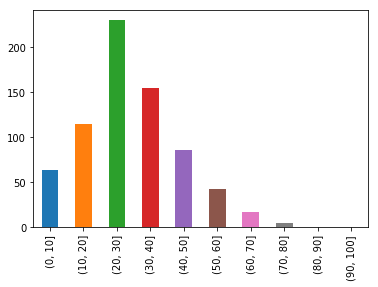

In [22]:
data ['Agebin'].value_counts().sort_index().plot(kind = 'Bar')

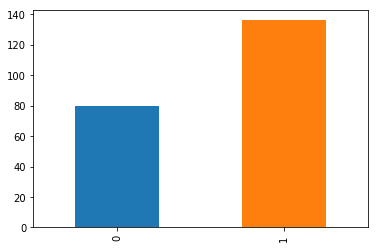

In [23]:
data[data['Pclass'] ==1]['Survived'].value_counts().sort_index().plot(kind = 'Bar')

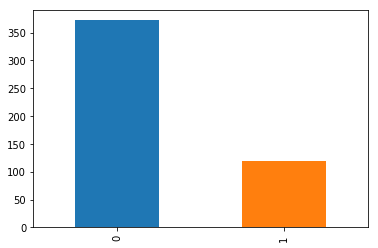

In [24]:
data[data['Pclass'] ==3]['Survived'].value_counts().sort_index().plot(kind = 'Bar')

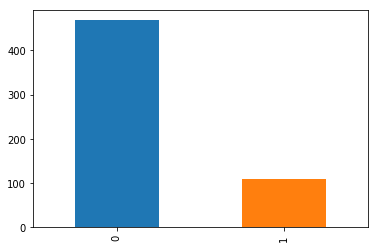

In [25]:
data[data['Sex'] =='male']['Survived'].value_counts().sort_index().plot(kind = 'Bar')

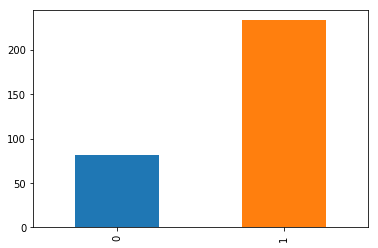

In [26]:
data[data['Sex'] =='female']['Survived'].value_counts().sort_index().plot(kind = 'Bar')

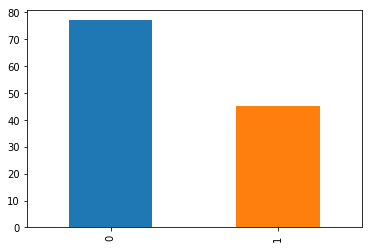

In [27]:
'''surviving chances of male in first passenger class is quite low'''
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind = 'bar')

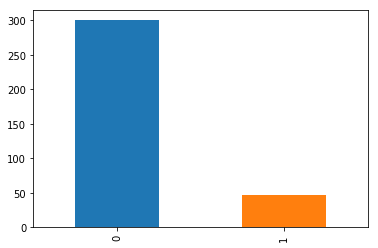

In [28]:
''' death magnitude is high in male in 3rd passenger class '''
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind = 'bar')

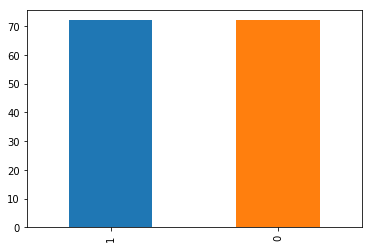

In [29]:
'''chances of surviving of female is equally distributed in 3rd passenger class '''
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind = 'bar')

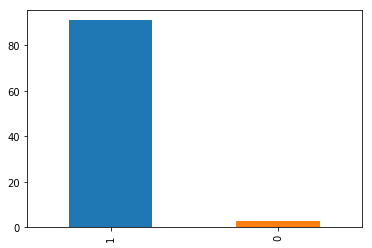

In [30]:
'''surviving percentage of female is more in first class'''
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind = 'bar')

## predicting the chance of survived passengers using sklearn

In [31]:
# survived be our target column
columns_target=['Survived']
columns_train=['Age','Pclass','Sex','Fare']
# taking columns and separating the data
x = data[columns_train]
y = data[columns_target]

In [32]:
# no NaN value spotted
x['Sex'].isnull().sum()

0

In [33]:
x['Pclass'].isnull().sum()

0

In [34]:
x['Fare'].isnull().sum()

0

In [35]:
# NaN values are spotted
x['Age'].isnull().sum()

177

In [36]:
# Age has NaN values so i am taking median of that by using fillna command 
x['Age']=x['Age'].fillna(x['Age'].median())
x['Age'].isnull().sum()

# in sklearn we cannot pass the string values so converting SEX column into string
# intializing the dictionary
d={'male':0,'female':1}
x['Sex']=x['Sex'].apply(lambda x :d[x])
x['Sex'].head()
                        

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [37]:
# final dataset
x.head()

,Age,Pclass,Sex,Fare
0,22.0,3,0,7.2500
1,38.0,1,1,71.2833
2,26.0,3,1,7.9250
3,35.0,1,1,53.1000
4,35.0,3,0,8.0500


In [38]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
from sklearn import svm
# declaring classifier
clf=svm.LinearSVC() 

# training model with the train data
# data sets are seprated by lines using linear support vector machine
clf.fit(x_train,y_train)
# printing the classifier details
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [40]:
# making some predictions
print (clf.predict(x_test[0:1]))

[0]


In [41]:
# predicting for multiple values
print (clf.predict(x_test[0:20]))

[0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1]


In [42]:
# checking accracy of model
print (clf.score(x_test,y_test))

0.7830508474576271


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

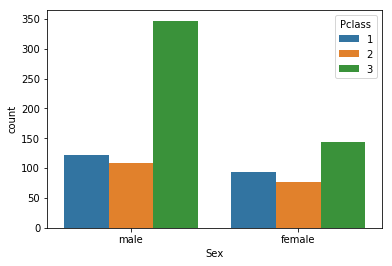

In [44]:
sns.countplot('Sex',data = data,hue = 'Pclass')

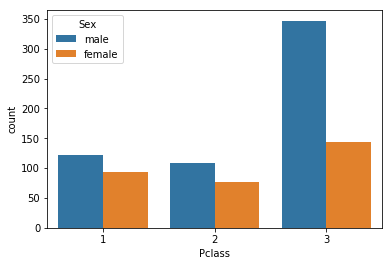

In [45]:
sns.countplot('Pclass',data = data,hue = 'Sex')

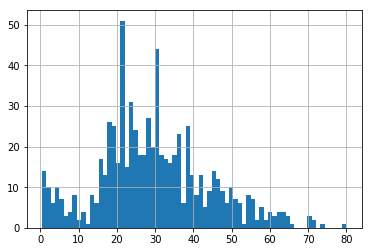

In [46]:
data['Age'].hist(bins=70)

In [47]:
data['Age'].mean()

29.69911764705882

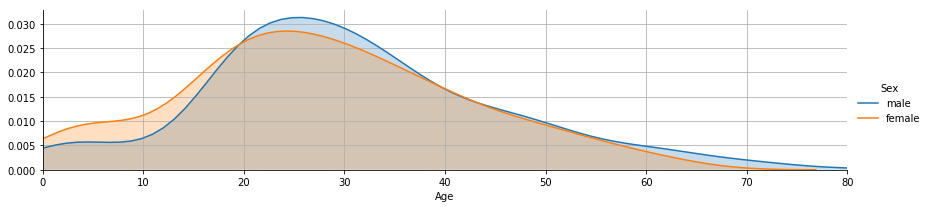

In [48]:
fig = sns.FacetGrid(data, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()

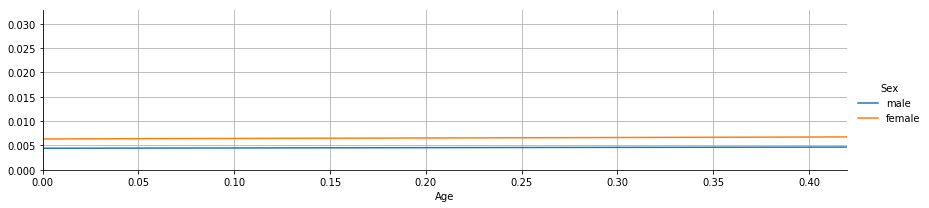

In [49]:
fig = sns.FacetGrid(data, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= False)
oldest = data['Age'].min()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()

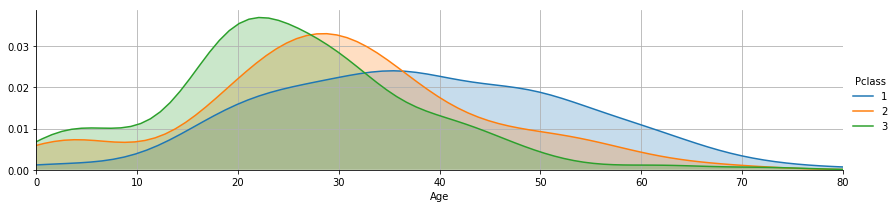

In [50]:
fig = sns.FacetGrid(data, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = data['Age'].max()
fig.set(xlim=(0,oldest))
plt.grid(True)
fig.add_legend()

In [51]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [52]:
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


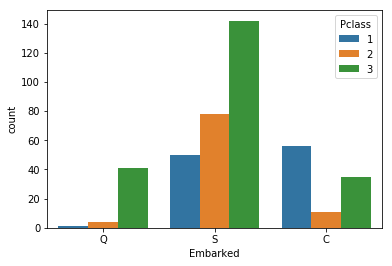

In [53]:
sns.countplot('Embarked',data=data1,hue='Pclass')

In [54]:
from collections import Counter
Counter(data1.Embarked)

Counter({'Q': 46, 'S': 270, 'C': 102})

In [55]:
data1.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

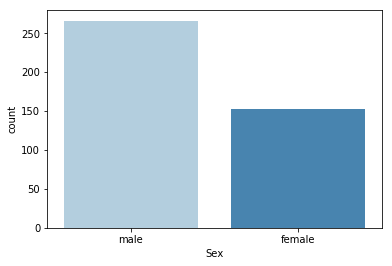

In [56]:
sns.countplot('Sex',data=data1,palette='Blues')

c:\python\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


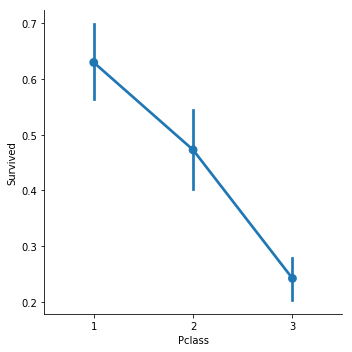

In [57]:
sns.factorplot('Pclass','Survived',data=data, order=[1,2,3])

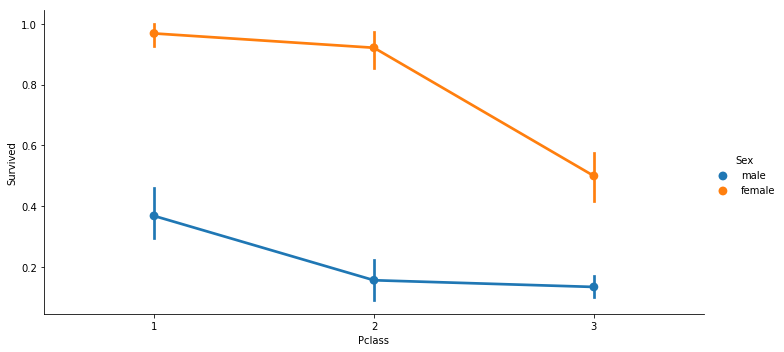

In [58]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data, order=[1,2,3], aspect=2)

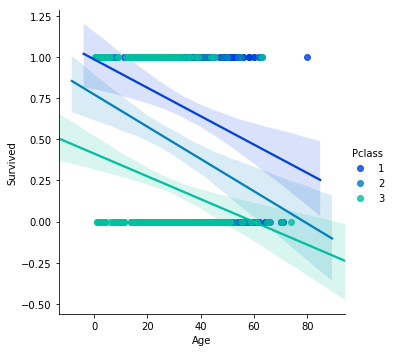

In [59]:
sns.lmplot('Age','Survived',hue='Pclass',data=data,palette='winter', hue_order=[1,2,3])

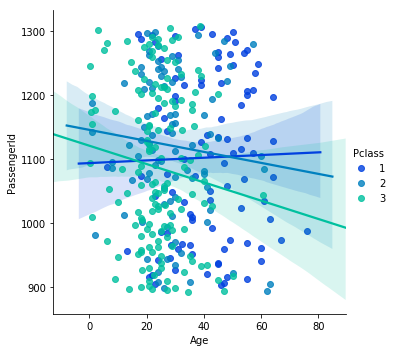

In [60]:
sns.lmplot('Age','PassengerId',hue='Pclass',data=data1,palette='winter', hue_order=[1,2,3])

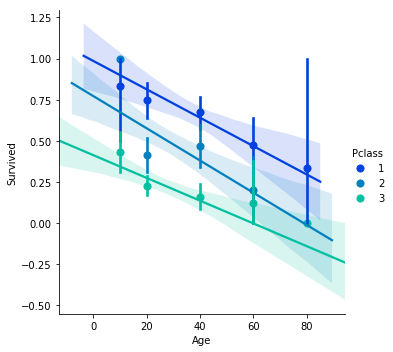

In [61]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=data,palette='winter',x_bins=generations,hue_order=[1,2,3])

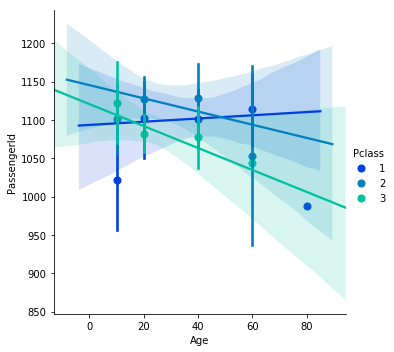

In [62]:
generations=[10,20,40,60,80]
sns.lmplot('Age','PassengerId',hue='Pclass',data=data1,palette='winter',x_bins=generations,hue_order=[1,2,3])

In [64]:
# Predict with "Random Forest"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


from sklearn.metrics import accuracy_score

In [63]:
from sklearn.model_selection import cross_val_score

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [66]:
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
data["Sex"][data["Sex"] == "male"] = 0
data["Sex"][data["Sex"] == "female"] = 1

data["Embarked"][data["Embarked"] == "S"] = 0
data["Embarked"][data["Embarked"] == "C"] = 1
data["Embarked"][data["Embarked"] == "Q"] = 2





#test
data1["Sex"][data1["Sex"] == "male"] = 0
data1["Sex"][data1["Sex"] == "female"] = 1

data1["Embarked"][data1["Embarked"] == "S"] = 0
data1["Embarked"][data1["Embarked"] == "C"] = 1
data1["Embarked"][data1["Embarked"] == "Q"] = 2





c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Agebin         714 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 67.2+ KB


In [75]:
data["Age"] = data["Age"].fillna(round(data["Age"].median()))
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].median())

#test
data1["Age"] = data1["Age"].fillna(round(data1["Age"].median()))
data1["Embarked"] = data1["Embarked"].fillna(data1["Embarked"].median())
data1["Fare"] =data1["Fare"].fillna(round(data1["Fare"].median()))

In [76]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,"(30, 40]"


In [77]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 29.4+ KB


In [78]:
target = data["Survived"].values
features_one = data[["Pclass", "Sex", "Age", "Fare","Embarked"]].values
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)
test_features = data1[["Pclass", "Sex", "Age", "Fare","Embarked"]].values
my_prediction = my_tree_one.predict(test_features)

In [80]:
my_prediction.shape

(418,)

In [81]:
print(my_prediction)

[0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 0 1 0 1 1 0 0 1 0 0 0]


In [83]:
PassengerId = np.array(data1["PassengerId"]).astype(int)
 
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
my_solution.to_csv("my_tree_one.csv", index_label = ["PassengerId"])